# Project: Wrangling and Analyze Data

## Data Gathering
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [32]:
# installing libraries
import pandas as pd
import requests
import numpy as np
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import seaborn as sns
import json
from datetime import datetime

In [33]:
# reading the twitter_archive csv file into a pandas dataframe
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")


In [34]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [35]:
# using Requests library to download the image predictions dataset
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
r = requests.get(url)
with open("image_predictions.tsv", "wb") as file:
    file.write(r.content)


In [36]:
# reading the image predictions file into a pandas dataframe
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t', header=0)

In [37]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [38]:
# using Tweepy to query additional data via the Twitter API
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [39]:
'''
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
'''

'\n# NOTE TO REVIEWER: this student had mobile verification issues so the following\n# Twitter API code was sent to this student from a Udacity instructor\n# Tweet IDs for which to gather additional data via Twitter\'s API\ntweet_ids = twitter_archive.tweet_id.values\nlen(tweet_ids)\n\n# Query Twitter\'s API for JSON data for each tweet ID in the Twitter archive\ncount = 0\nfails_dict = {}\nstart = timer()\n# Save each tweet\'s returned JSON as a new line in a .txt file\nwith open(\'tweet_json.txt\', \'w\') as outfile:\n    # This loop will likely take 20-30 minutes to run because of Twitter\'s rate limit\n    for tweet_id in tweet_ids:\n        count += 1\n        print(str(count) + ": " + str(tweet_id))\n        try:\n            tweet = api.get_status(tweet_id, tweet_mode=\'extended\')\n            print("Success")\n            json.dump(tweet._json, outfile)\n            outfile.write(\'\n\')\n        except tweepy.errors.TweepyException as e:\n            print("Fail")\n          

In [40]:
# Processing tweet-json file
# first, I changed it to a json file
# then, I appended the content of the json file to a list
additional_data = []
for line in open('tweet-json.json', 'r'):
    additional_data.append(json.loads(line))


In [41]:
# here, I am extracting the id, retweet count and favorite count from additional_data list to a new list that I will append to another list
dataframe_list = []
for line in additional_data:
    dataframe_list.append((line['id'], line['retweet_count'], line['favorite_count']))

In [42]:
# converting dataframe_list to a Pandas Dataframe
additional_data_df = pd.DataFrame(dataframe_list, columns=['tweet_id', 'retweet_count', 'favourite_count'])

In [43]:
additional_data_df.head()

,tweet_id,retweet_count,favourite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [44]:
# identifying retweets in twitter_archive
rt_status = twitter_archive.loc[twitter_archive['retweeted_status_id'].notnull(), ['tweet_id', 'text', 'expanded_urls']]
rt_status

,tweet_id,text,expanded_urls
19,888202515573088257,RT @dog_rates: This is Canela. She attempted s...,https://twitter.com/dog_rates/status/887473957...
32,886054160059072513,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,https://twitter.com/dog_rates/status/886053434...
36,885311592912609280,RT @dog_rates: This is Lilly. She just paralle...,https://twitter.com/dog_rates/status/830583320...
68,879130579576475649,RT @dog_rates: This is Emmy. She was adopted t...,https://twitter.com/dog_rates/status/878057613...
73,878404777348136964,RT @dog_rates: Meet Shadow. In an attempt to r...,"https://www.gofundme.com/3yd6y1c,https://twitt..."
...,...,...,...
1023,746521445350707200,RT @dog_rates: This is Shaggy. He knows exactl...,https://twitter.com/dog_rates/status/667866724...
1043,743835915802583040,RT @dog_rates: Extremely intelligent dog here....,https://twitter.com/dog_rates/status/667138269...
1242,711998809858043904,RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,https://twitter.com/twitter/status/71199827977...
2259,667550904950915073,RT @dogratingrating: Exceptional talent. Origi...,https://twitter.com/dogratingrating/status/667...


In [45]:
rt_status.head(20)

,tweet_id,text,expanded_urls
19,888202515573088257,RT @dog_rates: This is Canela. She attempted s...,https://twitter.com/dog_rates/status/887473957...
32,886054160059072513,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,https://twitter.com/dog_rates/status/886053434...
36,885311592912609280,RT @dog_rates: This is Lilly. She just paralle...,https://twitter.com/dog_rates/status/830583320...
68,879130579576475649,RT @dog_rates: This is Emmy. She was adopted t...,https://twitter.com/dog_rates/status/878057613...
73,878404777348136964,RT @dog_rates: Meet Shadow. In an attempt to r...,"https://www.gofundme.com/3yd6y1c,https://twitt..."
74,878316110768087041,RT @dog_rates: Meet Terrance. He's being yelle...,https://twitter.com/dog_rates/status/669000397...
78,877611172832227328,RT @rachel2195: @dog_rates the boyfriend and h...,https://twitter.com/rachel2195/status/87685077...
91,874434818259525634,RT @dog_rates: This is Coco. At first I though...,https://twitter.com/dog_rates/status/866334964...
95,873697596434513921,RT @dog_rates: This is Walter. He won't start ...,https://twitter.com/dog_rates/status/868880397...
97,873337748698140672,RT @dog_rates: This is Sierra. She's one preci...,https://www.gofundme.com/help-my-baby-sierra-g...


## Assessing Data


### Quality issues
1. Dissimilar ordering of tweet id's in the three datasets

2. Unncessary columns eg. source in twitter_archive dataset

3. Retweets included in twitter_archive dataset

4. Tweets with no images, ie in twitter_archive but not in image_predictions

5. Missing values

6. Some predictions are not dogs

7 & 8. Date and time in string datatype and conjoined into one column

9. Length of three dataframes not equal 

### Tidiness issues
1. dog breed predictions in image_predictions dataframe do not have a uniform lettercase

2. Dog stages variables spread across four columns instead of one


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [46]:
# Making copies of original dataframes
twt_arc_df = twitter_archive.copy()
predictions_df = image_predictions.copy()
add_data = additional_data_df.copy()

In [47]:
twt_arc_df.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


### Issue 1: Tweets without images


#### Define
Total number of tweets without images can be calculated as:
    len(`twitter_archive`) - len(`image_predictions`)
1. Collect all ids in tweet_archive
2. Collect all ids in image_predictions
3. Create a list of ids in twitter archive that are not present in image predictions
4. Match the tweet archive dataframe to the ids that are present in image predictions

#### Code

In [48]:
# creating a list of tweet_ids in twitter_archive
twt_arc_id_list = [id for id in twt_arc_df.tweet_id.values]
len(twt_arc_id_list)

2356

In [49]:
predictions_df = predictions_df.set_index('tweet_id')
predictions_df = predictions_df.reindex(index=twt_arc_df['tweet_id'])
predictions_df = predictions_df.reset_index()

In [50]:
# creating a list of tweet_ids in image predictions
pred_id_list = [id for id in predictions_df.tweet_id.values]
len(pred_id_list)

2356

In [53]:
# creating a list of ids in twitter_archive not present in image_predictions
missing_ids = []
for id in twt_arc_id_list:
    if id not in pred_id_list:
        missing_ids.append(id)
len(missing_ids)

0

In [54]:
# match tweet archive dataframe to ids that are present in image_predictions
twt_arc_df = twt_arc_df[~twt_arc_df['tweet_id'].isin(missing_ids)]

In [55]:
len(twt_arc_df)

2356

#### Test

In [56]:
missing_ids_found = 0

for id in missing_ids:
    if id in twt_arc_df.tweet_id.values:
        missing_ids_found += 1

print(f"Missing Ids found: {missing_ids_found}")


Missing Ids found: 0


### Issue 2: Dissimilar ordering of tweet id's in the three datasets

#### Define
The tweet_ids in tweet_archive and additional data are the same. Only image predictions needs to be changed
1. Create a list of ids in tweet_archive
2. Set the list to be the index of image predictions
3. Reset the index of image predictions


#### Code

In [57]:
ordered_id = [id for id in twt_arc_df.tweet_id.values]


[892420643555336193,
 892177421306343426,
 891815181378084864,
 891689557279858688,
 891327558926688256,
 891087950875897856,
 890971913173991426,
 890729181411237888,
 890609185150312448,
 890240255349198849,
 890006608113172480,
 889880896479866881,
 889665388333682689,
 889638837579907072,
 889531135344209921,
 889278841981685760,
 888917238123831296,
 888804989199671297,
 888554962724278272,
 888202515573088257,
 888078434458587136,
 887705289381826560,
 887517139158093824,
 887473957103951883,
 887343217045368832,
 887101392804085760,
 886983233522544640,
 886736880519319552,
 886680336477933568,
 886366144734445568,
 886267009285017600,
 886258384151887873,
 886054160059072513,
 885984800019947520,
 885528943205470208,
 885518971528720385,
 885311592912609280,
 885167619883638784,
 884925521741709313,
 884876753390489601,
 884562892145688576,
 884441805382717440,
 884247878851493888,
 884162670584377345,
 883838122936631299,
 883482846933004288,
 883360690899218434,
 883117836046

In [58]:
# reordering the arrangement of tweet_id columns in predictions_df to match tweet_archive_df
predictions_df = predictions_df.set_index('tweet_id')
predictions_df = predictions_df.reindex(index=twt_arc_df['tweet_id'])
predictions_df = predictions_df.reset_index()

#### Test

In [59]:
if twt_arc_df.tweet_id.values.all() == predictions_df.tweet_id.values.all():
    x = True
else:
    x = True
print(x)

True


### Issue 3: Retweets included in twitter_archive dataset

#### Define

The retweets can be identified as the rows without null values in retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns

1. Match twitter archive to retweeted_status_id null rows
2. Drop retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns from the dataframe

#### Code

In [60]:
# Match twitter archive to retweeted_status_id null rows
twt_arc_df = twt_arc_df[twt_arc_df.retweeted_status_id.isnull()]

In [61]:
# Drop retweet columns
twt_arc_df.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [62]:
twt_arc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  doggo                  2175 non-null   object 
 11  floofer                2175 non-null   object 
 12  pupper                 2175 non-null   object 
 13  puppo                  2175 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ 

### Issue 4

#### Define
Unnncessary column(s) in tweet_archive
- source


#### Code

In [63]:
twt_arc_df.drop(columns=('source'), inplace=True)

#### Test

In [64]:
twt_arc_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'text', 'expanded_urls', 'rating_numerator', 'rating_denominator',
       'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Issue 5: Missing Values

#### Define 
Fill missing values in twitter archive in_reply_to_user_id and in_reply_to_status_id columns with None

#### Code

In [65]:
twt_arc_df.in_reply_to_user_id.fillna(value='Empty', inplace=True)

In [66]:
twt_arc_df.in_reply_to_status_id.fillna(value='Empty', inplace=True)

#### Test

In [67]:
twt_arc_df.isnull().sum()

tweet_id                  0
in_reply_to_status_id     0
in_reply_to_user_id       0
timestamp                 0
text                      0
expanded_urls            58
rating_numerator          0
rating_denominator        0
name                      0
doggo                     0
floofer                   0
pupper                    0
puppo                     0
dtype: int64

### Issue 6: Some predictions are not dog predictions

#### Define
Match predictions dataframe to rows where any one of p1_dog, p2_dog and p3_dog == True
Here, we'll have to trust the predictions of the neural network because manually checking every of the images in the dataset will be nebulous. 




#### Code

In [68]:
dog_tweets = predictions_df.query('p1_dog == True or p2_dog == True or p3_dog == True')

In [69]:
predictions_df = dog_tweets

#### Test

In [70]:
predictions_df.sample(20)[['p1_dog', 'p2_dog', 'p3_dog']]

,p1_dog,p2_dog,p3_dog
1245,False,True,True
1170,True,True,True
1288,False,True,True
5,True,True,False
1057,False,True,False
1763,True,True,True
352,True,True,True
1885,True,True,True
1176,True,True,True
1351,True,True,True


In [71]:
test_list_a = [predictions_df.p1_dog.values.all()]
test_list_b = [predictions_df.p2_dog.values.all()]
test_list_c = [predictions_df.p3_dog.values.all()]
for value in test_list_a, test_list_b, test_list_c:
    if value in test_list_a == False and value in test_list_b == False and value in test_list_c == False:
        statement = 'Non-dog predictions present'
    else:
        statement = 'All predictions are dog predictions'
print(statement)


All predictions are dog predictions


### Issues 7 & 8: Date and time in string datatype and in the same column


### Define 
1. Convert timestamp to a datatime object
2. Create 2 new columns and assign date and time to the new columns separately
3. Drop timestamp column

#### Code

In [72]:
twt_arc_df.timestamp = pd.to_datetime(twt_arc_df.timestamp)

In [73]:
twt_arc_df['date'] = twt_arc_df.timestamp.dt.date.astype('datetime64')

In [74]:
twt_arc_df['time'] = twt_arc_df.timestamp.dt.strftime('%H:%M')

In [75]:
twt_arc_df.drop(columns=['timestamp'], inplace=True)

In [76]:
twt_arc_df.head()[['date', 'time']]

,date,time
0,2017-08-01,16:23
1,2017-08-01,00:17
2,2017-07-31,00:18
3,2017-07-30,15:58
4,2017-07-29,16:00


#### Test

In [77]:
twt_arc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               2175 non-null   int64         
 1   in_reply_to_status_id  2175 non-null   object        
 2   in_reply_to_user_id    2175 non-null   object        
 3   text                   2175 non-null   object        
 4   expanded_urls          2117 non-null   object        
 5   rating_numerator       2175 non-null   int64         
 6   rating_denominator     2175 non-null   int64         
 7   name                   2175 non-null   object        
 8   doggo                  2175 non-null   object        
 9   floofer                2175 non-null   object        
 10  pupper                 2175 non-null   object        
 11  puppo                  2175 non-null   object        
 12  date                   2175 non-null   datetime64[ns]
 13  tim

### Issue 9: Uneven length between predictions and additional data


#### Define
Merge the three dataframes using `inner join` method

#### Code

In [78]:
tweet_arc_master = pd.concat([twt_arc_df.set_index('tweet_id'), predictions_df.set_index('tweet_id'), add_data.set_index('tweet_id')], axis=1, join='inner').reset_index()

#### Test

In [79]:
tweet_arc_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               1686 non-null   int64         
 1   in_reply_to_status_id  1686 non-null   object        
 2   in_reply_to_user_id    1686 non-null   object        
 3   text                   1686 non-null   object        
 4   expanded_urls          1686 non-null   object        
 5   rating_numerator       1686 non-null   int64         
 6   rating_denominator     1686 non-null   int64         
 7   name                   1686 non-null   object        
 8   doggo                  1686 non-null   object        
 9   floofer                1686 non-null   object        
 10  pupper                 1686 non-null   object        
 11  puppo                  1686 non-null   object        
 12  date                   1686 non-null   datetime64[ns]
 13  tim

## Tidiness Issues

1. dog breed predictions in image_predictions dataframe not uniform in appearance. Should all be in lowercase.

2. Dog stages should be one column instead of 4 since they're the same variable Dog_Stage

### Issue 1: dog breed predictions in image_predictions dataframe not uniform in appearance. 
Should all be in lowercase

#### Define
convert all values in p1, p2, p3 to lowercase for consistency

#### Code

In [80]:
tweet_arc_master.p1 = tweet_arc_master.p1.str.lower()

In [81]:
tweet_arc_master.p2 = tweet_arc_master.p2.str.lower()

In [82]:
tweet_arc_master.p3 = tweet_arc_master.p3.str.lower()

#### Test

In [83]:
tweet_arc_master.head()[['p1', 'p2', 'p3']]

,p1,p2,p3
0,chihuahua,pekinese,papillon
1,chihuahua,malamute,kelpie
2,paper_towel,labrador_retriever,spatula
3,basset,english_springer,german_short-haired_pointer
4,chesapeake_bay_retriever,irish_terrier,indian_elephant


### Issue 2: Dog stage variables spread across four columns instead of one

#### Define
1. Write a function to search through all the values in the dog_stage rows and retun non-null values
2. Create a new column and assign the values of the function to the new row.
3. Drop unncessary columns


#### Code

In [84]:
def replace_func(row):
    target_cols = [row.doggo, row.floofer, row.pupper, row.puppo]
    for val in target_cols:
        if val != 'None':
            return val
#tweet_arc_master.columns
tweet_arc_master['dog_stage'] = tweet_arc_master.apply(replace_func, axis=1)
tweet_arc_master.dog_stage.value_counts()

pupper     168
doggo       64
puppo       21
floofer      7
Name: dog_stage, dtype: int64

In [85]:
tweet_arc_master.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

#### Test


In [86]:
tweet_arc_master.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'text',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'date', 'time', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweet_count',
       'favourite_count', 'dog_stage'],
      dtype='object')

In [87]:
tweet_arc_master.head()[['tweet_id','name',
       'date', 'time', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweet_count',
       'favourite_count', 'dog_stage']]

,tweet_id,name,date,time,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favourite_count,dog_stage
0,892177421306343426,Tilly,2017-08-01,00:17,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,6514,33819,None
1,891815181378084864,Archie,2017-07-31,00:18,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461,None
2,891689557279858688,Darla,2017-07-30,15:58,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908,None
3,891327558926688256,Franklin,2017-07-29,16:00,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,9774,41048,None
4,891087950875897856,None,2017-07-29,00:08,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,chesapeake_bay_retriever,0.425595,True,irish_terrier,0.116317,True,indian_elephant,0.076902,False,3261,20562,None


## Storing Data
Saving gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [88]:
tweet_arc_master.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

#### Insight 1
What is the most common dog stage in the dataset?

In [89]:
tweet_arc_master.dog_stage.describe()

# The most common dog stage is pupper

count        260
unique         4
top       pupper
freq         168
Name: dog_stage, dtype: object

In [90]:
tweet_arc_master.dog_stage.value_counts()

pupper     168
doggo       64
puppo       21
floofer      7
Name: dog_stage, dtype: int64

Most of the dogs in the dataset are young'uns! People love their baby doggos and are probably most excited about showing them off to the world when they're still young. 

#### Insight 2
What was the most frequent rating?

In [91]:
tweet_arc_master.rating_numerator.mode()

0    12
dtype: int64

In [92]:
tweet_arc_master.rating_numerator.value_counts()

12     423
10     360
11     356
13     229
9      133
8       68
7       32
14      23
6       16
5       14
4        7
3        5
2        2
165      1
1        1
24       1
144      1
26       1
27       1
44       1
45       1
50       1
60       1
75       1
80       1
84       1
88       1
99       1
121      1
143      1
0        1
Name: rating_numerator, dtype: int64

Dogs most frequently got ratings of 12/10. 
Most of the dogs rated by WeRateDogs are good dogs, Brent.

#### Insight 3
There is a strong correlation between retweet count and favourite count. 
This means that tweets which were retweeted widely also had a lot of likes. 

In [93]:
tweet_arc_master[['retweet_count', 'favourite_count']].corr()

,retweet_count,favourite_count
retweet_count,1.000000,0.913176
favourite_count,0.913176,1.000000


### Insight 4
What was the most common dog breed?

In [94]:
tweet_arc_master.p1.mode()

0    golden_retriever
dtype: object

In [95]:
tweet_arc_master.p2.mode()

0    labrador_retriever
dtype: object

In [96]:
tweet_arc_master.p3.mode()

0    labrador_retriever
dtype: object

The most common dog breeds across the three neural network predictions were labrador retriever and golden retriever

### Visualization

In [97]:
tweet_arc_master.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'text',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'date', 'time', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweet_count',
       'favourite_count', 'dog_stage'],
      dtype='object')

Find the top 10 tweets with the highest number of retweets

In [98]:
# the highest confidence rating is p1 since the neural network retrieved the three most accurate predictions
x = tweet_arc_master
top_10 = x.nlargest(10, 'retweet_count')[['retweet_count','p1']]
top_10

,retweet_count,p1
691,79515,labrador_retriever
363,56625,chihuahua
719,52360,eskimo_dog
278,48265,lakeland_terrier
53,45849,english_springer
299,42228,standard_poodle
365,37911,arabian_camel
100,32883,french_bulldog
1294,31989,bubble
305,31314,cocker_spaniel


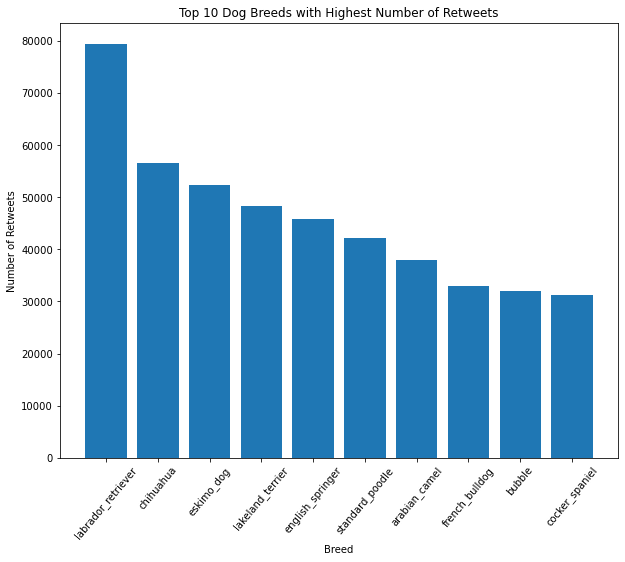

In [99]:

plt.figure(figsize=(10,8))
plt.bar('p1','retweet_count', data=top_10)
plt.xlabel('Breed', size=10)
plt.xticks(size=10, rotation=50)
plt.ylabel('Number of Retweets', size=10)
plt.title('Top 10 Dog Breeds with Highest Number of Retweets')
plt.show()